# Setup Awal

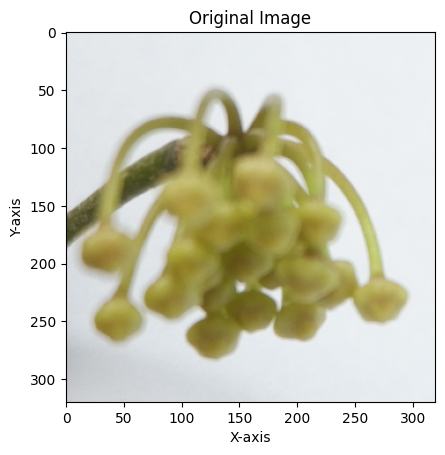

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Load gambar
img_path = 'D:/dataset_bungaCrop/train/aff parviflora/1.JPG'  # Ganti dengan path kamu
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize ke 320x320 sebelum augmentasi
img = cv2.resize(img, (320, 320))
h, w = img.shape[:2]

# Buat folder output
output_dir = 'augmented_images'
os.makedirs(output_dir, exist_ok=True)

# show image 
plt.imshow(img)
plt.title("Original Image")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.xticks(np.arange(0, img.shape[1], 50))  # Angka X setiap 50 piksel
plt.yticks(np.arange(0, img.shape[0], 50))  # Angka Y setiap 50 piksel
plt.grid(False)
plt.show()


# Fungsi show
def show_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.xticks(np.arange(0, image.shape[1], 50))  # Angka X setiap 50 piksel
    plt.yticks(np.arange(0, image.shape[0], 50))  # Angka Y setiap 50 piksel
    plt.grid(False)
    plt.show()

# Rotasi

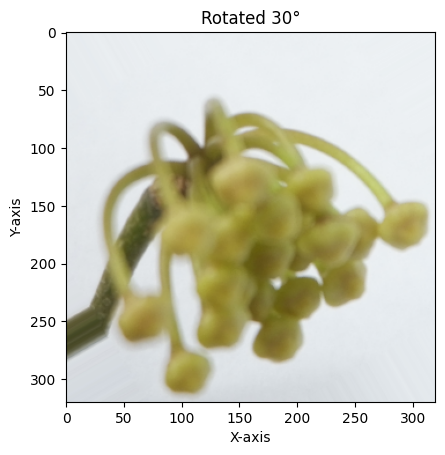

(-0.5, 319.5, 319.5, -0.5)

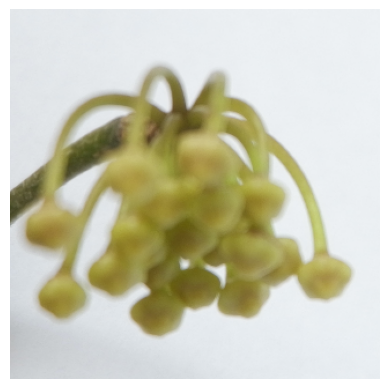

In [3]:
def rotate_image(img, angle):
    M = cv2.getRotationMatrix2D((w/2, h/2), angle, 1)
    rotated = cv2.warpAffine(img, M, (w, h), borderMode=cv2.BORDER_REPLICATE)
    return rotated

rotated_img = rotate_image(img, 30)
show_image(rotated_img, "Rotated 30°")

plt.imshow(img)
plt.axis('off')

# Height Shift

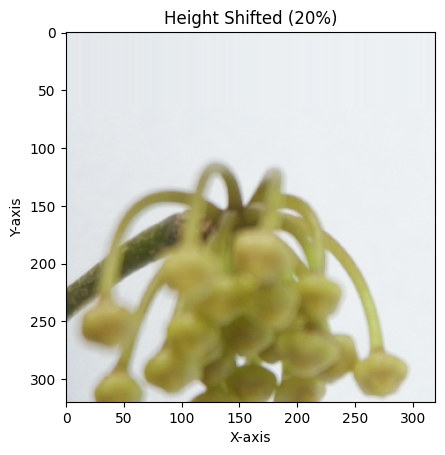

(-0.5, 319.5, 319.5, -0.5)

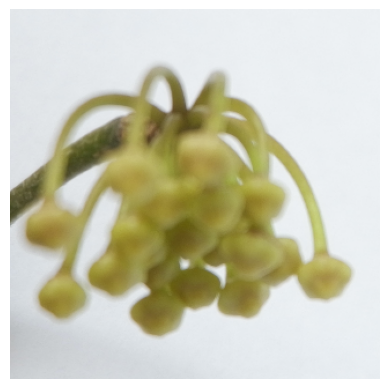

In [4]:
def height_shift_image(img, shift_ratio):
    ty = shift_ratio * img.shape[0]  # height
    M = np.float32([[1, 0, 0], [0, 1, ty]])
    shifted = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]), borderMode=cv2.BORDER_REPLICATE)
    return shifted

height_shifted_img = height_shift_image(img, 0.2)
show_image(height_shifted_img, "Height Shifted (20%)")

plt.imshow(img)
plt.axis('off')

# Width Shift

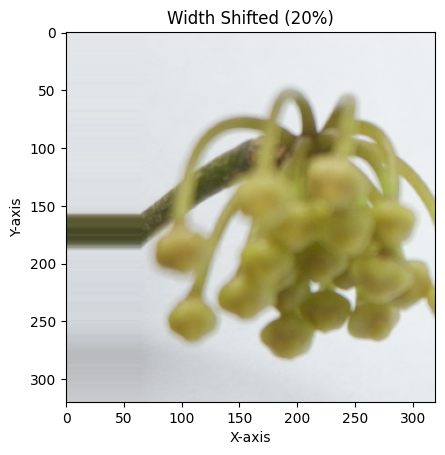

(-0.5, 319.5, 319.5, -0.5)

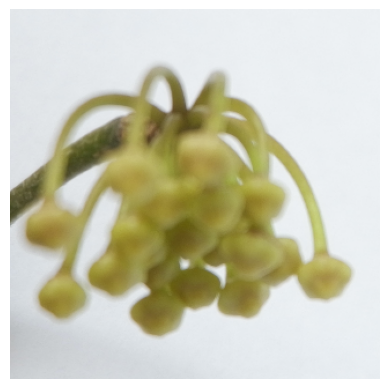

In [5]:
def width_shift_image(img, shift_ratio):
    tx = shift_ratio * img.shape[1]  # width
    M = np.float32([[1, 0, tx], [0, 1, 0]])
    shifted = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]), borderMode=cv2.BORDER_REPLICATE)
    return shifted

width_shifted_img = width_shift_image(img, 0.2)
show_image(width_shifted_img, "Width Shifted (20%)")

plt.imshow(img)
plt.axis('off')


# Shear (kemiringan)

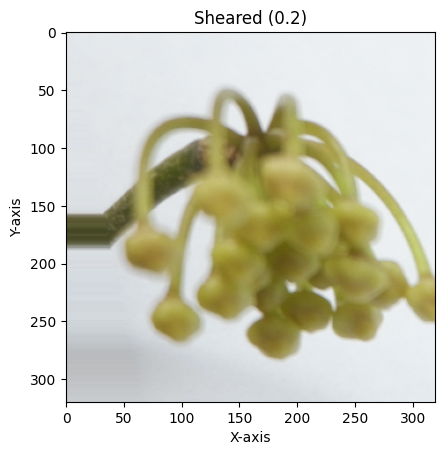

(-0.5, 319.5, 319.5, -0.5)

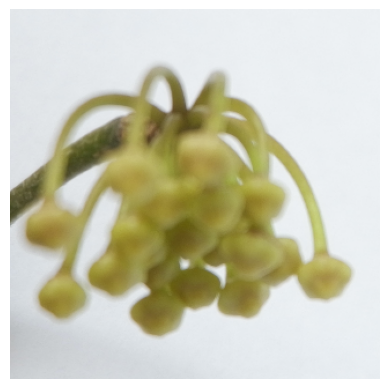

In [6]:
def shear_image(img, shear_factor):
    M = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared = cv2.warpAffine(img, M, (w, h), borderMode=cv2.BORDER_REPLICATE)
    return sheared

sheared_img = shear_image(img, 0.2)
show_image(sheared_img, "Sheared (0.2)")

plt.imshow(img)
plt.axis('off')

# Zoom

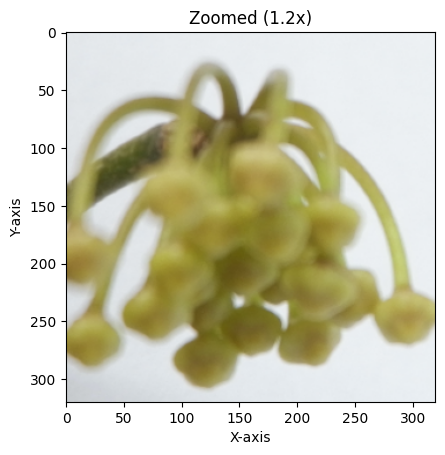

(-0.5, 319.5, 319.5, -0.5)

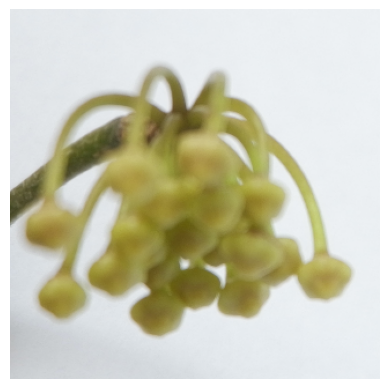

In [7]:
def zoom_image(img, zoom_factor):
    center_x, center_y = w//2, h//2
    new_w, new_h = int(w / zoom_factor), int(h / zoom_factor)
    cropped = img[center_y-new_h//2:center_y+new_h//2, center_x-new_w//2:center_x+new_w//2]
    zoomed = cv2.resize(cropped, (w, h))
    return zoomed

zoomed_img = zoom_image(img, 1.2)
show_image(zoomed_img, "Zoomed (1.2x)")

plt.imshow(img)
plt.axis('off')

# Flip

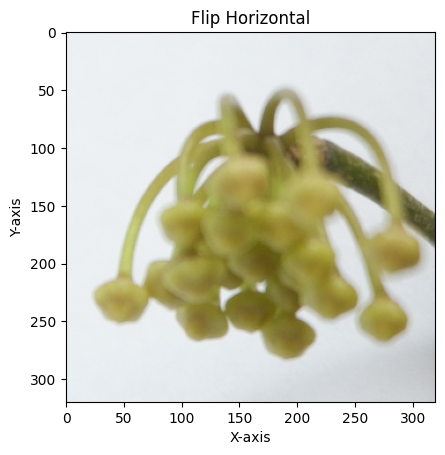

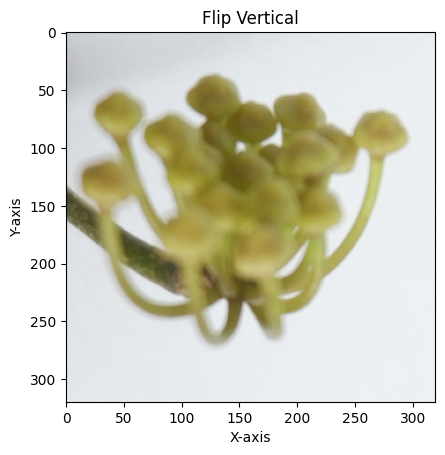

In [8]:
def flip_image(img, mode='horizontal'):
    if mode == 'horizontal':
        return cv2.flip(img, 1)
    elif mode == 'vertical':
        return cv2.flip(img, 0)

flip_h = flip_image(img, 'horizontal')
flip_v = flip_image(img, 'vertical')

show_image(flip_h, "Flip Horizontal")

show_image(flip_v, "Flip Vertical")

# Brightness adjustment

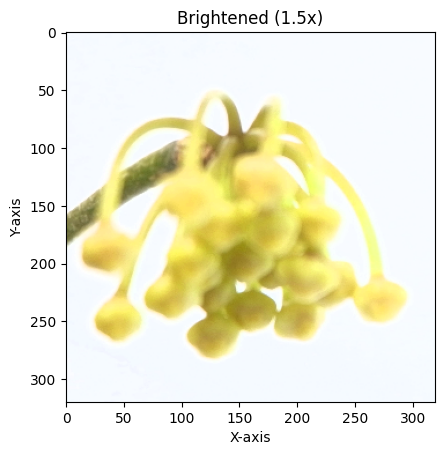

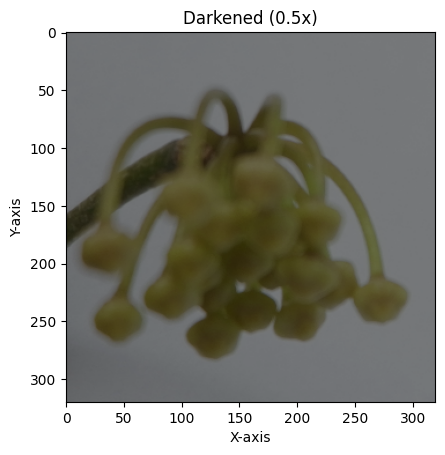

In [9]:
def adjust_brightness(img, factor):
    hsv = cv2.cvtColor(cv2.cvtColor(img, cv2.COLOR_RGB2BGR), cv2.COLOR_BGR2HSV).astype(np.float64)
    hsv[..., 2] *= factor
    hsv[..., 2] = np.clip(hsv[..., 2], 0, 255)
    bright = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2BGR)
    return cv2.cvtColor(bright, cv2.COLOR_BGR2RGB)

bright_img = adjust_brightness(img, 1.5)
dark_img = adjust_brightness(img, 0.5)

show_image(bright_img, "Brightened (1.5x)")

show_image(dark_img, "Darkened (0.5x)")